<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula01a_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def criaDataset(n=20):
  X = np.random.uniform(size=(n,2))
  y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
print(X)
print(y)

[[0.07147723 0.69003726]
 [0.63766646 0.70314426]
 [0.97314011 0.50746209]
 [0.9368299  0.48239212]
 [0.64752596 0.28994149]
 [0.3722281  0.70215177]
 [0.03305141 0.05947149]
 [0.93077169 0.15710022]
 [0.86215414 0.92370198]
 [0.59258957 0.58870272]
 [0.49978848 0.69143102]
 [0.31361007 0.86905531]
 [0.87684252 0.37175799]
 [0.81432738 0.3627379 ]
 [0.7591752  0.10746199]
 [0.29861257 0.57916812]
 [0.7241834  0.06625692]
 [0.78099594 0.50372071]
 [0.87667848 0.84162765]
 [0.23160604 0.67182713]]
[-1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1]


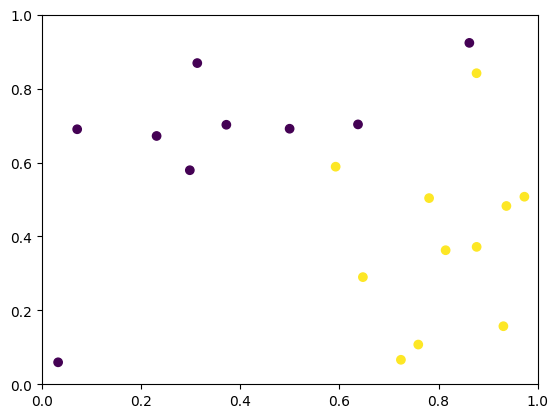

In [4]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)

plotDataset(X, y)
plt.show()

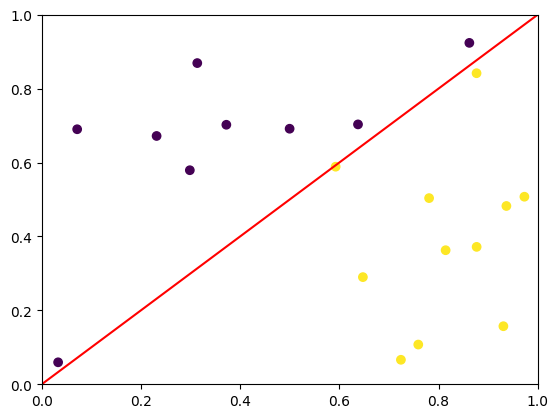

In [5]:
def plotHiperplano(vector):
  xs = np.array([0,1])
  ys = -(vector[0]*xs)/vector[1]
  plt.plot(xs, ys, 'r-')

plotDataset(X, y)
plotHiperplano([1, -1])
plt.show()

In [20]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1

class DummyClassifier(BaseEstimator, ClassifierMixin):
  def __init__(self):
    pass

  def fit(self, X, y):
    self.classes_ = np.unique(y)
    return self

  def predict(self, X):
    # return np.random.choice(self.classes_, len(X))
    # return np.array(X[:,0]>X[:,1], dtype=int)*2-1
    w = np.array([1, -1])
    ypred = sign(X.dot(w))
    return ypred

model = DummyClassifier()
model.fit(X, y)
ypred = model.predict(X)
print(ypred)
print(accuracy_score(y, ypred))

[-1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1]
1.0


In [36]:
class PerceptronPLA(BaseEstimator, ClassifierMixin):
  def __init__(self, n_iter=10):
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w = np.random.uniform(size=X.shape[1])*2-1
    # PLA - Percptron Learning Algorithm
    for _ in range(self.n_iter):
      cost = 0
      idx = np.arange(len(y))
      np.random.shuffle(idx)
      for i in idx:
        ypred = sign(X[i].dot(self.w))
        error = y[i]-ypred
        if error != 0:
          self.w += error*X[i]
          cost += error**2
      if cost == 0:
        break
    self.classes_ = np.unique(y)
    return self

  def predict(self, X):
    return np.array([sign(x.dot(self.w)) for x in X])

model = PerceptronPLA()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(ypred)
print(accuracy_score(y, ypred))

[ 5.02571984 -4.71136961]
[-1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1]
1.0


[ 3.19331549 -3.09851457]


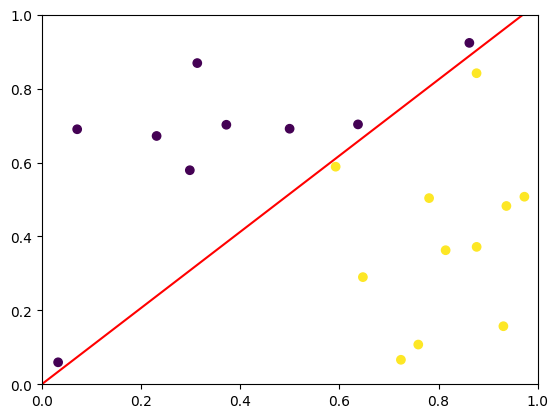

In [67]:
model = PerceptronPLA()
model.fit(X, y)
print(model.w)
plotDataset(X, y)
plotHiperplano(model.w)
plt.show()

0.983


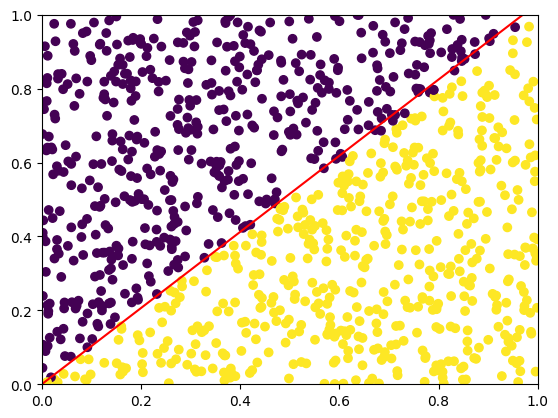

In [68]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w)
plt.show()

In [100]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, n_iter=500):
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w = np.random.uniform(size=X.shape[1])*2-1
    # Notação vetorial
    for _ in range(self.n_iter):
      ypred = sign(X.dot(self.w))
      error = y-ypred
      self.w += X.T.dot(error)
      cost = np.sum(error**2)
      if cost == 0:
        break
    return self

  def predict(self, X):
    return sign(X.dot(self.w))

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(ypred)
print(accuracy_score(y, ypred))

[ 27.75484882 -26.3430569 ]
[-1 -1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1 -1]
1.0


[ 28.70413682 -27.20448465]


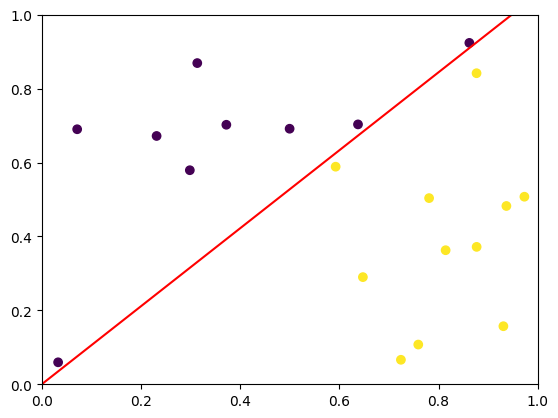

In [110]:
model = Perceptron()
model.fit(X, y)
print(model.w)
plotDataset(X, y)
plotHiperplano(model.w)
plt.show()

0.977


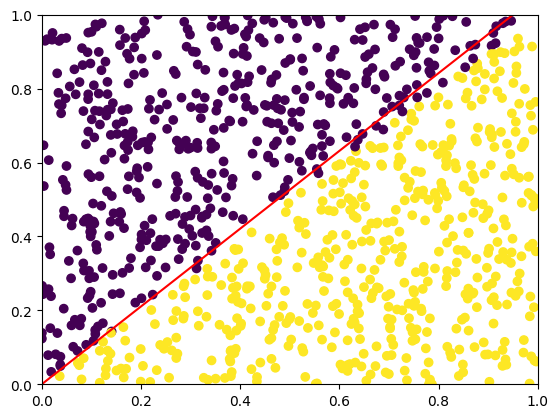

In [109]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w)
plt.show()

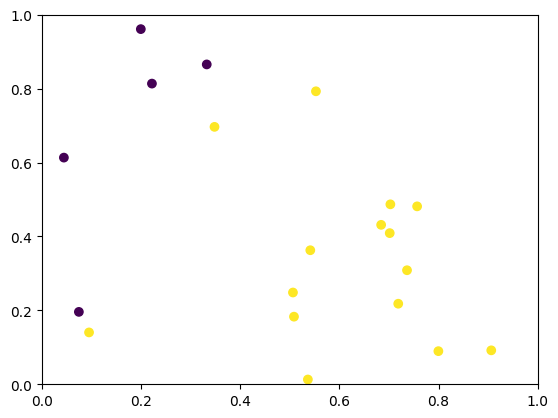

In [115]:
def criaDataset(n=20, slop=[2,1]):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop)
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
plotDataset(X, y)
plt.show()

[10.37596545 -5.03736121]


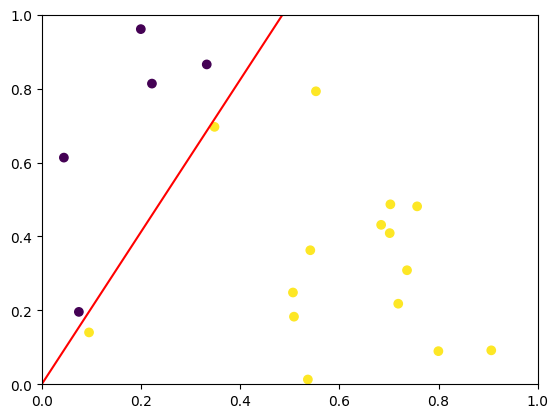

In [116]:
model = Perceptron()
model.fit(X, y)
print(model.w)
plotDataset(X, y)
plotHiperplano(model.w)
plt.show()

0.991


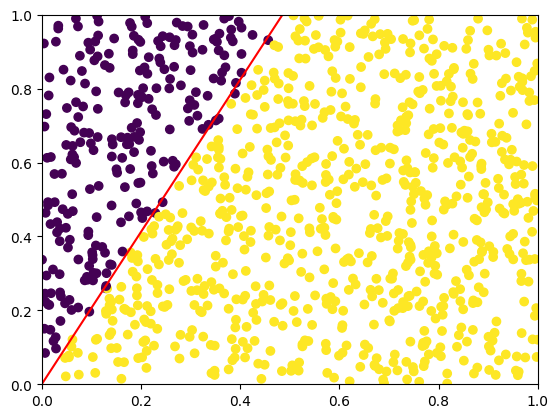

In [117]:
Xtest, ytest = criaDataset(1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(model.w)
plt.show()